In [1]:
%matplotlib inline
import numpy as np;
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(1337)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)

def error_plot(ys, yscale='log'):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(len(ys)), ys, **kwargs)

$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\grad}{\nabla}
\newcommand{\eps}{\varepsilon}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L10: Gradient Descent Variants

Jake Abernethy, Benjamin Bray, Naveen Kodali

*Thursday, September 20, 2018*

### Recall:  Gradient Descent

Minimize an objective $f : \R^d \rightarrow \R$ by following the negative gradient direction:

$$
x_{t+1} = x_t - \eta_t \nabla f(x_t) 
$$

Last time, we began proving the following convergence rate:

<div style="padding:20px;margin:20px;border:1px solid black">
<b>Theorem:</b> If $f : \R^d \rightarrow \R$ is convex, differentiable and L-Lipschitz on all of $\R^d$ and $||x_0 - x^*|| \leq R$ where $x^*$ is the global minimum, then there is a step size $\eta > 0$ such that the iterates of gradient descent satisfy
$$
f\left(\frac{1}{t}\sum_{i=0}^{t}x_i\right) - f(x^*) \leq \frac{R L}{\sqrt{t}}
$$
</div>

### Problem:  Tuning the Step Size

Last time, we were able to show that for any step size $\eta > 0$,

$$f\left(\frac{1}{t}\sum_{i=0}^{t}x_i\right) - f(x^*) \leq \frac{R^2}{2\eta t} + \frac{\eta L^2}{2}$$

<div style="padding:20px;margin:20px;border:1px solid black">
<b>Problem:</b> Find the choice of step size $\eta > 0$ that gives the best possible bound on the convergence rate.  What is the corresponding bound?
</div>

### Solution:  Tuning the Step Size

Define $g(\eta) = \frac{R^2}{2\eta t} + \frac{\eta L^2}{2}$ and differentiate:

$$
\frac{\partial g}{\partial \eta}
= \frac{-R^2}{2\eta^2 t} + \frac{L^2}{2}
$$

Setting the derivative to zero and solving for $\eta$ gives $\eta = \frac{R}{L\sqrt{t}}$.  Plugging this into $g$ proves the theorem!

### Choosing the Step Size

In general, there are several strategies for choosing the step size:

* **Constant:**  Choose the same step size $\eta_t = \eta$ for all times.
* **Theoretical:** Choose a step size that guarantees a nice convergence rate.
* **Shrinking:**  Choose some sequence $\eta_t \rightarrow 0$ to guarantee convergence.
* **Line Search:** Solve a nested minimization to pick the best step size in the current direction: $$\eta_t = \arg\min_{\eta \in (0,1]} x_{t-1} + \eta \nabla f(x_{t-1})$$
* **Adaptive Step Size:** Use more information about the function/problem to adjust the step size as needed.  For example, *Newton's method* adjusts the step size based on the curvature of $f$ at the current iterate.

### Remark:  Projected Gradient Descent

Suppose we want to minimize $f : \Omega \rightarrow \R$ within some convex set $\Omega \subset \R^d$ instead of the entire space $\R^d$.  We can still apply gradient descent as long as we **project** back onto the convex domain $\Omega$ after each iteration:

<div style="display:flex; justify-content:center; align-items:center; margin: 0 auto">
<img src="images/l10-projected-gd.png">
<div>
$$
\begin{align}
y_{t+1} &= x_t - \eta_t \grad f(x_t) \\
x_{t+1} &= \Pi_\Omega(y_{t+1})
\end{align}
$$
</div>
</div>
Here, $\Pi_\Omega(x) = \min_{z \in \Omega} \norm{z-x}_2^2$ projects onto the convex set $\Omega$.

<div style="padding:10px; margin:10px; border: 1px solid black">
<b>Problem:</b> Argue that Projected Gradient Descent achieves the same convergence rate by making a minor adjusment to the proof.
</div>

### Assumptions about the Objective

When minimizing an objective $f : \Omega \rightarrow \R$ using gradient descent, we can obtain stronger convergence guarantees by making assumptions about how "nice" of a function $f$ is:

* **Convex:** $f(\theta x + (1-\theta) y) \leq \theta f(x) + (1-\theta) f(y)$ for all $x,y \in \Omega$ and $\theta \in [0,1]$
* **$L$-Lipschitz:** $\norm{\nabla f(x)} \leq L$
* **$\alpha$-Strongly Convex:** $\nabla^2 f(x) \succcurlyeq \alpha I$
* **$\beta$-Smooth:** $\nabla^2 f(x) \preccurlyeq \beta I$

# Strong Convexity & Smoothness

### Problem:  Matrix Inequalities

Remember the notation $C \succcurlyeq D$ means $C - D$ is positive-semidefinite.  Below, let $A \in \R^{n \times n}$ be symmetric.

<div style="padding:10px;margin:10px;border:1px solid black">
<b>Part A:</b> For some $\alpha \in \R$, when is $\alpha I \succcurlyeq 0$?  When is $\alpha I \preccurlyeq 0$? <br/>

<b>Part B:</b> If $A$ has eigenpairs $A v_k = \lambda_k v_k$ for $1 \leq k \leq n$, what are the eigenvalues and eigenvectors of $A - \alpha I$ when $\alpha \in \R$?<br/>

<b>Part B:</b>  Let $A \in \R^{n \times n}$ be symmetric.  For fixed $\alpha > 0$, which conditions guarantee that $A \succcurlyeq \alpha I$?  What about $A \preccurlyeq \alpha I$?
</div>

### Solution:  Matrix Inequalities

**Part A:** The eigenvalues of $\alpha I$ are all equal to $\alpha$, so this matrix is psd when $\alpha \geq 0$ and nsd when $\alpha \leq 0$.

**Part B:** The matrix $A - \alpha I$ has eigenvectors $v_k$ and eigenvalues $\mu_k = \lambda_k - \alpha$, since
$$
(A - \alpha I) v_k = A v_k - \alpha v_k = (\lambda_k - \alpha) v_k
$$

**Part C:** By definition, $A \succcurlyeq \alpha I$ iff $A - \alpha I$ is positive semidefinite.  By the previous part, this requires $\lambda_k \geq \alpha$ for all $k$.  Similarly, $A \preccurlyeq \alpha I$ whenever $\lambda_k \leq \alpha$ for all $k$.

### Def:  Strongly Convex

Remember that a differentiable function $f : \Omega \rightarrow \R$ is convex iff it lies above its linear approximation at every point, that is,
    $$
    f(y) \geq f(x) + \inner{ \nabla f(x), y-x } \quad \forall\, x,y \in \Omega
    $$
    
A function is **$\alpha$-strongly convex** if it also lies above a *quadratic* approximation at every point, where $\alpha$ controls the steepness:
    $$
    f(y) \geq f(x) + \inner{ \nabla f(x), y-x } + \tfrac{\alpha}{2} \norm{y - x}^2
    $$
    
<div style="padding:10px;margin:10px;border: 1px solid black">
<b>Problem:</b> Prove that every strongly convex function is convex.
</div>

### Problem:  Second-Order Condition for Strong Convexity

<div style="padding:10px;margin:10px;border: 1px solid black">
<b>Problem:</b> Show that if $f$ is twice-differentiable and $\alpha$-strongly convex, then $\nabla^2 f \succcurlyeq \alpha I$.
</div>

> *Hint:* First, show that $f$ is $\alpha$-strongly convex if and only if the function $g(x) = f(x) - \frac{\alpha}{2}\norm{x}_2^2$ is convex.  Then, use the second-order condition for convexity on $g$.

### Def:  $\beta$-Smoothness

A function $f : \Omega \rightarrow \R$ is $\beta$-smooth if it lies *below* a quadratic at each point:

$$
f(y) \leq f(x) + \inner{ \nabla f(x), y-x } + \tfrac{\beta}{2} \norm{y-x}_2^2
$$

Similarly to strong-convexity, a twice-differentiable function is $\beta$-smooth if and only if $\nabla^2 f(x) \preccurlyeq \beta I$ for all $x \in \Omega$.

### Problem:  Quadratic Forms

Let $A \in \R^{d \times d}$ be symmetric and positive-definite and define $f(x) = \frac{1}{2} x^T A x$.  

* Is $f$ smooth?  If so, with what smoothness constant?
* Is $f$ strongly convex?  If so, with what constant?


### Gradient Descent for Smooth and Strongly-Convex Functions

Let $f(x)$ be a $\beta$-smooth and $\lambda$-strongly convex function with minimizer $x^*$. Assume our initial point is $x_1$, and repeatedly perform gradient descent: $x_{t+1} = x_t - \eta \nabla f(x_t)$. Then it can be shown that
$$
   f(x_T) - f(x^*) \leq \frac{\beta}{2} \exp(-4T/(\kappa + 1)) \|x_1 - x^*\|^2.
$$
where $\kappa = \frac{\beta}{\lambda}$ is the *condition number*, and the learning rate needs to be set as $\eta = \frac{2}{\lambda + \beta}$.

### Frank-Wolfe / Conditional Gradient

Let $f(x)$ be a $\beta$-smooth function, and assume we want to solve $\min_{x \in \Omega} f(x)$ for some constrained set $\Omega$ with diameter $D$. The *Frank-Wolfe* algorithm does the following:

+ Initialize $x_1$ to some arbitrary point in $\Omega$
+ For $t=1,2,\ldots, T$:
    + compute $v_t + \arg\min_{v \in \Omega} v^\top\nabla f(x_t)$
    + update $x_{t+1} = x_t + \eta_t (v_t - x_t)
    
**Theorem**: after $T$ rounds of Frank-Wolfe, we have that
$$ f(x_t) - f(x^*) \leq \frac{2 \beta D^2}{t + 2}$$
for step size $\eta_t = 2/(t+2)$.

[more](http://fa.bianp.net/blog/2018/notes-on-the-frank-wolfe-algorithm-part-i/) [information](https://ee227c.github.io/notes/ee227c-lecture05.pdf)

# Implementation

> Adapted from [Moritz Hardt's lecture notebook](https://ee227c.github.io/code/lecture4.html)


## Projected Gradient Descent

We start with a basic implementation of projected gradient descent.  Note that this implementation keeps around all points computed along the way. This is clearly not what you would do on large instances. We do this for illustrative purposes to be able to easily inspect the computed sequence of points.

In [4]:
def gradient_descent(init, steps, grad, proj=lambda x: x):
    """Projected gradient descent.
    
    Inputs:
        initial: starting point
        steps: list of scalar step sizes
        grad: function mapping points to gradients
        proj (optional): function mapping points to points
        
    Returns:
        List of all points computed by projected gradient descent.
    """
    xs = [init]
    for step in steps:
        x_step = xs[-1]
        x_update = None
        xs.append(x_update)
    return xs

## Warm-Up:  Optimizing a Quadratic

As a toy example, let's optimize $f(x) = \frac{1}{2} \norm{x}^2$, which has gradient $\nabla f(x) = x$.

In [5]:
def quadratic(x):
    return 0.5*x.dot(x)


# What is the gradient of this function?
def quadratic_gradient(x):
    return None


Note the function is  1-smooth and  1-strongly convex. Our theorems would then suggest that we use a constant step size of  1.  If you think about it, for this step size the algorithm will actually find the optimal solution in just one step.

In [7]:
x0 = np.random.normal(0, 1, (1000))
_, x1 = gradient_descent(x0, [1.0], quadratic_gradient)

Indeed, it does:

In [8]:
x1.all() == 0

True

Let's see what happens if we don't have the right learning rate.

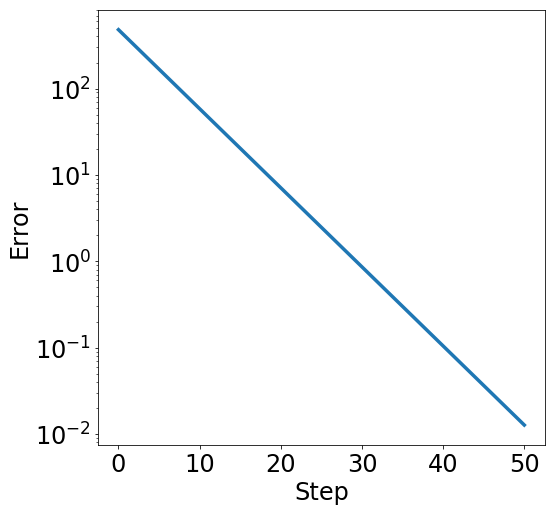

In [9]:
xs = gradient_descent(x0, [0.1]*50, quadratic_gradient)
error_plot([quadratic(x) for x in xs])

### Constrained Optimization

Let's say we want to optimize the function inside some affine subspace. Recall that affine subspaces are convex sets. Below we pick a random low dimensional affine subspace  b+U  and define the corresponding linear projection operator.

In [ ]:
# U is an orthonormal basis of a random 100-dimensional subspace.
U = np.linalg.qr(np.random.normal(0, 1, (1000, 100)))[0]
b = np.random.normal(0, 1, 1000)

def proj(x):
    """Projection of x onto an affine subspace"""
    return None
# What is this???

In [ ]:
x0 = np.random.normal(0, 1, (1000))
xs = gradient_descent(x0, [0.1]*50, quadratic_gradient, proj)
# the optimal solution is the projection of the origin
x_opt = proj(0)
error_plot([quadratic(x) for x in xs])
plt.plot(range(len(xs)), [quadratic(x_opt)]*len(xs),
        label='$\\frac{1}{2}|\!|x_{\mathrm{opt}}|\!|^2$')
plt.legend()

The orangle line shows the optimal error, which the algorithm reaches quickly. The iterates also converge to the optimal solution in domain as the following plot shows.

In [ ]:
error_plot([np.linalg.norm(x_opt-x)**2 for x in xs])